# QUESTION CATEGORY OF SQUAD

The programs enable to :
    - extract questions from the squad dataset (different env : dev and train)
    - cluster the questions categories
    - create an embedding of the question (gensim and sent2vec)
    - Model for clustering :
        - simple autoencoder
        - variational autoencoder
        - K-means    

## Questions Embedding

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm
import json
import numpy as np

import sent2vec

from sklearn.model_selection import train_test_split

   
def get_questions_embedding_sent2vec(filename, data_type, model_pretrained):
        
        print('Start embedding sent2vec {} file'.format(data_type))
        emb_questions=[]
        
        nb_question = 0
        
        model = sent2vec.Sent2vecModel()
        model.load_model(model_pretrained)        

        with open(filename, 'r', encoding='utf-8') as fh:
            source = json.load(fh)
            for article in source["data"]:
                for para in article["paragraphs"]:
                    for qa in tqdm(para["qas"]):
                        nb_question += 1
                        question= qa["question"].replace("''", '" ').replace("``", '" ')

                        # beaware, use the embeggin method for one question and for several questions (embed_questions)
                        emb_question = model.embed_sentence(question)

                        emb_questions.append(emb_question)

        print('nb_question:',nb_question)
        return np.array(emb_questions),nb_question

def get_questions_embedding_gesim(filename, data_type, embedding_size,
                                window=1, min_count=1, workers=8, 
                                alpha=0.025, min_alpha=0.01, 
                                dm=0, train_lbls=False, epochs=100):
        
        print('Start embedding gesim {} file'.format(data_type))
        tagged_questions=[]
        nb_question = 0

        with open(filename, 'r', encoding='utf-8') as fh:
            source = json.load(fh)
            for article in source["data"]:
                for para in article["paragraphs"]:
                    for qa in tqdm(para["qas"]):
                        nb_question += 1
                        question= qa["question"].replace("''", '" ').replace("``", '" ')

                        tagged_question = TaggedDocument(question,[nb_question])

                        tagged_questions.append(tagged_question)

        model = Doc2Vec(vector_size=embedding_size, window=window, min_count=min_count, 
                        workers=workers, alpha=alpha, min_alpha=min_alpha, 
                        dm=dm, train_lbls=train_lbls)

        model.build_vocab(tagged_questions)
        model.train(tagged_questions, total_examples=len(tagged_questions), epochs=epochs)
        
        print('nb_question:',nb_question)
        return model,nb_question

def get_train_test_set_from_sent2vec(data_type, emb_questions_array):
    print('Start split {} file from sent2vec'.format(data_type))
    x_train,x_test = train_test_split(emb_questions_array, train_size=0.70, shuffle=False)
    
    return x_train,x_test
    
def get_train_test_set(data_type, model, nb_question):

    print('Start split {} file'.format(data_type))
    print('Total question :', nb_question)
    size_split = int(nb_question*2/3)
    print('size_split:',size_split)

    x_train = [model.docvecs[i].tolist() for i in range(size_split)]
    x_test = [model.docvecs[j].tolist() for j in range(nb_question-size_split)]

    x_train = np.array(x_train)
    x_test = np.array(x_test)

    return x_train,x_test

<b>The squad dataset variables</b>

In [9]:
filename_train = 'data/squad/train-v1.1.json'
data_type_train = "train"

filename_dev = 'data/squad/dev-v1.1.json'
data_type_dev = "dev"

filename_test = 'data/squad/test.json'
data_type_test = 'test'

<b>Gensim embedding</b>

In [3]:
# embedding_size = 300

# model,nb_question = get_questions_embedding_gesim(filename_dev,data_type_dev,embedding_size)
# print('Total questions : ', nb_question)

# model,nb_question = get_questions_embedding_gesim(filename_test,data_type_test,embedding_size)
# print('Total questions : ', nb_question)

# x_train,x_test = get_train_test_set(data_type_dev, model, nb_question)

<b>Sent2vec embedding</b>

In [10]:
MODEL_PRETRAINED_WIKI_UNIGRAMS = "/home/karim/spacework/models/wiki_unigrams.bin"

emb_questions,nb_question = get_questions_embedding_sent2vec(filename_dev,data_type_dev, MODEL_PRETRAINED_WIKI_UNIGRAMS)
x_train, x_test = get_train_test_set_from_sent2vec(data_type_dev, emb_questions)

# emb_questions,nb_question = get_questions_embedding_sent2vec(filename_test,data_type_test, MODEL_PRETRAINED_WIKI_UNIGRAMS)
# x_train, x_test = get_train_test_set_from_sent2vec(data_type_test, emb_questions) 

# emb_questions,nb_question = get_questions_embedding_sent2vec(filename_train,data_type_train, MODEL_PRETRAINED_WIKI_UNIGRAMS)
# x_train, x_test = get_train_test_set_from_sent2vec(data_type_train, emb_questions) 

print('nombre question:', nb_question)
print('emb_questions.shape:',emb_questions.shape)

print('x_train.shape:',x_train.shape)
print('x_test.shape:',x_test.shape)

  0%|          | 0/10 [00:00<?, ?it/s]

Start embedding sent2vec dev file


100%|██████████| 4/4 [00:00<00:00, 3637.73it/s]


100%|██████████| 5/5 [00:00<00:00, 1628.48it/s]


100%|██████████| 4/4 [00:00<00:00, 5590.54it/s]


100%|██████████| 5/5 [00:00<00:00, 4375.45it/s]


100%|██████████| 4/4 [00:00<00:00, 8232.20it/s]


100%|██████████| 5/5 [00:00<00:00, 2379.61it/s]


100%|██████████| 5/5 [00:00<00:00, 7384.34it/s]


100%|██████████| 4/4 [00:00<00:00, 4639.72it/s]


100%|██████████| 5/5 [00:00<00:00, 3559.32it/s]


100%|██████████| 5/5 [00:00<00:00, 9818.13it/s]


100%|██████████| 5/5 [00:00<00:00, 2236.25it/s]


100%|██████████| 5/5 [00:00<00:00, 4657.23it/s]


nb_question: 10570
Start split dev file from sent2vec
nombre question: 10570
emb_questions.shape: (10570, 600)
x_train.shape: (7398, 600)
x_test.shape: (3172, 600)


/home/karim/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Questions Categories with NLP

<b><i>Before running the program, be sure you have the server up</i></b>

<b>For local :</b> 

The stanford corenlp is : /home/karim/spacework/StandfordCoreNLP/stanford-corenlp-full-2018-02-27
 
Then, the server needs to be launched : 

java -mx6g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000 -encoding utf-8

<b>For the dev0 server : </b>

/home/ubuntu/spacework/StandfordCoreNLP/stanford-corenlp-full-2018-02-27

java -mx10g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000 -encoding utf-8

In [11]:
import corenlp
import spacy
import json
from tqdm import tqdm

import os

import re

def extract_question_category(filename, filename_ques_cat_to_write, data_type):

    print('Extract category question for {} examples'.format(data_type))

    ques_cat_file = open(filename_ques_cat_to_write, 'w')
    
    questions_categories = []

    nlp = spacy.blank("en")

    def word_tokenize(sent):
        doc = nlp(sent)
        return [token.text for token in doc]

    pattern_pos_verb = '(?:[pos: /VB.*/])' 

    #beware because of the term "which" and "that" are WDT POS
    pattern_pos_interrogative = '(?:[pos: /WP.*/]|[pos: WRB]|[pos: WDT])'
    
    question_types=['what', 'how', 'who', 'when', 'which', 'where', 'why', 'whom', 'whose'] #, 'verb', 'other']
    print('question_types:', question_types)
    num_question = 0
    
    interrogative_words_errors = ['whic','whixh','whicy','whoch','whichgroup', 
                                  'whch','whatare','whhat','wha','whar','whatyear','ehat',
                                  'waht','whao','wats','whate','whas','whad','wa','hat',
                                  'wher','howmany','hoe','whn','whan','whaen','whed','whee',
                                  'whio','whi','ho','wy']

    interro_words_errors_dict = {'whic':'which','whixh':'which','whicy':'which','whoch':'which',
                                 'whichgroup':'which','whch':'which','whatare':'what','whhat':'what',
                                 'wha':'what','whar':'what','whatyear':'what','ehat':'what',
                                 'waht':'what','whao':'what','wats':'what','whate':'what','whas':'what',
                                 'whad':'what','wa':'what','wher':'where','howmany':'how','hoe':'how',
                                 'whn':'when','whan':'when','whaen':'when','whed':'when','whee':'when',
                                 'whio':'who','whi':'who','ho':'who','wy':'why'}
    
    #Method enables to return the correct interrogative word in case of incorrect word
    def correct_interrogative_word(tokens):
        intersection_error_word = set(tokens).intersection(interrogative_words_errors)

        if len(intersection_error_word) == 1:
            correct_word = interro_words_errors_dict.get(intersection_error_word.pop())
            return correct_word
        else:
            return None
        
    word_to_write = ""
    total_write = 0
    
    with open(filename, 'r') as fh:
        source = json.load(fh)
        for article in source["data"]:
            for para in article["paragraphs"]:
                for qa in para["qas"]:
                #for qa in tqdm(para["qas"]):
                    num_question += 1
                    
                    question= qa["question"].replace("''", '" ').replace("``", '" ')
                    question = str(question).encode('utf-8').decode('latin-1').lower()
                    
                    #the corenlp will not be call if there is only one interrogative word
                    tokens = word_tokenize(question)
                    
                    #intersection of the question's token and the question's type
                    interro_words_in_question = set(tokens).intersection(question_types)
                    
                    correct_word = correct_interrogative_word(tokens)

                    if len(interro_words_in_question) == 1:
                        #there is one interrogative word in the question
                        questions_categories.append(list(interro_words_in_question)[0])
                        
                        word_to_write += list(interro_words_in_question)[0]+','
                        total_write += 1
                    elif correct_word != None:
                        questions_categories.append(correct_word)
                        word_to_write += correct_word +","
                        total_write += 1
                    elif len(interro_words_in_question) == 0:
                        #there is no interrogative word in the question
                        #maybe it is question with only vb 
                        with corenlp.CoreNLPClient() as client:  
                            #The verb in the question
                            matches_pos_vb = client.tokensregex(question, pattern_pos_verb)
                            
                            if matches_pos_vb["sentences"][0]["length"] > 0:
                                questions_categories.append('verb')
                                word_to_write += "verb" +","
                                total_write += 1
                            else:
                                questions_categories.append('other')
                                word_to_write += "other" +","
                                total_write += 1
                    else:
                        
                        with corenlp.CoreNLPClient() as client:  

                            ann = client.annotate(question)

                            #The interrogative word in the question
                            matches_pos_interrogative = client.tokensregex(question, pattern_pos_interrogative)

                            len_matches_pos_interrogative = matches_pos_interrogative["sentences"][0]["length"]

                            if len_matches_pos_interrogative > 0:
                                word = matches_pos_interrogative["sentences"][0]["0"]["text"]
                                if len_matches_pos_interrogative >= 1 and word != 'that':
                                    questions_categories.append(word)
                                    word_to_write += word +","
                                    total_write += 1
                                elif len_matches_pos_interrogative > 1 and word == 'that':
                                    word = matches_pos_interrogative["sentences"][0]["1"]["text"] 
                                    questions_categories.append(word)
                                    word_to_write += word +","
                                    total_write += 1
                                else:
                                    questions_categories.append('other')
                                    word_to_write += "other" +","
                                    total_write += 1
                            else:
                                questions_categories.append('other')
                                word_to_write += "other" +","
                                total_write += 1
    
    # remove the last character a coma and write all the categories in a file
    word_to_write = word_to_write[:-1]
    ques_cat_file.write(word_to_write)
        
    return questions_categories,total_write  

<b>Run the question category extraction program for different environnement</b> 

In [13]:
# categorie_question_filename_train = 'data/question/questions_categories_{}.txt'.format(data_type_train)
# questions_categories_train = extract_question_category(filename_train, categorie_question_filename_train, data_type_train)
# print('category_questions:',questions_categories_train)

ques_cat_filename_dev = 'data/question/{}_ques_categories.txt'.format(data_type_dev)
questions_categories_dev,total_write = extract_question_category(filename_dev, ques_cat_filename_dev, data_type_dev)
print('category_questions:',questions_categories_dev)

# ques_cat_filename_test = 'data/question/questions_categories_{}.txt'.format(data_type_test)
# questions_categories_test = extract_question_category(filename_test, ques_cat_filename_test, data_type_test)
# print('category_questions:',questions_categories_test)

Extract category question for dev examples
question_types: ['what', 'how', 'who', 'when', 'which', 'where', 'why', 'whom', 'whose']
category_questions: ['which', 'which', 'where', 'which', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'who', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'what', 'who', 'what', 'which', 'where', 'verb', 'what', 'which', 'how', 'what', 'what', 'who', 'who', 'who', 'who', 'how', 'who', 'what', 'which', 'what', 'how', 'which', 'who', 'who', 'how', 'who', 'who', 'who', 'who', 'who', 'who', 'what', 'who', 'how', 'which', 'which', 'how', 'who', 'how', 'who', 'how', 'how', 'who', 'what', 'what', 'how', 'who', 'how', 'how', 'how', 'which', 'who', 'what', 'how', 'how', 'what', 'how', 'which', 'what', 'which', 'which', 'which', 'who', 'what', 'what', 'what', 'who', 'which', 'what', 'who', 'what', 'what', 'how', 'what', 'what', 'who', 'who', 'who', 'which', 'what', 'who', 'what', 'what', 'who', 'which', 'what', 'w

<b><font color="red">At the end of the extraction of the questions categories, the server stanford corenlp can be shut down</font></b>

<b>Be sure about the number of question category</b>

In [14]:
print('len(questions_categories_dev):',len(questions_categories_dev))
print('total_write:',total_write)

assert len(questions_categories_dev) == total_write

len(questions_categories_dev): 10570
total_write: 10570


## DATA PREPROCESSING FOR THE MODELS

<b>Agregate and encode categories questions</b>

In [15]:
categorie_question_filename = 'data/question/dev_ques_categories.txt'
#categorie_question_filename = 'data/question/train_ques_categories.txt'

def get_agregate_questions_categories(filename_cat_questions):
    with open(filename_cat_questions, 'r') as category_questions:

        categories_questions = [line.split(',') for line in category_questions.readlines()]

        categories_questions = categories_questions[0]

        categories_dict = dict()
        
        total = 0

        for categorie in categories_questions:
            total += 1

            nb_cat = categories_dict.get(categorie)
            if nb_cat is None:
                nb_cat = 1
            else:
                nb_cat = nb_cat + 1

            categories_dict.update({categorie:nb_cat})

    return categories_dict,total

categories_dict, total = get_agregate_questions_categories(categorie_question_filename)

print('categories_dict:', categories_dict)   
print('total:', total)  

categories_dict: {'which': 700, 'where': 477, 'what': 6023, 'who': 1108, 'verb': 83, 'how': 1225, 'when': 713, 'whose': 40, 'why': 155, 'whom': 37, 'other': 9}
total: 10570


<b>Get categories question and prepare the data for the autoencoder</b>

In [16]:
def get_questions_categories_array(filename, questions_categories_dic):

    questions_categories_array = []

    with open(categorie_question_filename, 'r') as cat_ques_dev:

        categories_questions = [line.split(',') for line in cat_ques_dev.readlines()]
        categories_questions = categories_questions[0]
        
        total = 0

        for categorie in categories_questions:
            total += 1

            categorie_code = questions_categories_dict.get(categorie)
            questions_categories_array.append(categorie_code)
    
    return questions_categories_array

# categorie_question_filename = 'data/question/train_ques_categories.txt'
categorie_question_filename = 'data/question/dev_ques_categories.txt'

questions_categories_dict = {'how': 1, 'other': 2, 'verb': 3, 'what': 4, 'when': 5, 
                          'where': 6, 'which': 7, 'who': 8, 'whom': 9, 'whose': 10, 'why': 11}

questions_categories_array = get_questions_categories_array(categorie_question_filename, questions_categories_dict)
print('len(questions_categories_array):',len(questions_categories_array))

len(questions_categories_array): 10570


In [17]:
def get_train_test_cat_split_question(questions_categories_array, data_type):

    print('Start split {} file'.format(data_type))
    x_cat_train, x_cat_test = train_test_split(questions_categories_array, train_size=0.70, shuffle=False)
    
    return x_cat_train,x_cat_test


def get_train_test_cat_question(questions_categories_array, data_type, nb_question):

    print('Start split {} file'.format(data_type))
    print('Total question :', nb_question)
    size_split = int(nb_question*2/3)
    print('size_split:',size_split)
    
    x_cat_train = questions_categories_array[:size_split]
    x_cat_test = questions_categories_array[size_split:]

    return x_cat_train,x_cat_test

#x_cat_train,x_cat_test = get_train_test_cat_question(questions_categories_list, data_type, len(questions_categories_list))

x_cat_train,x_cat_test = get_train_test_cat_split_question(questions_categories_array, data_type_dev)
# x_cat_train,x_cat_test = get_train_test_cat_split_question(questions_categories_array, data_type_train)

print('len(x_cat_train):',len(x_cat_train))
print('len(x_cat_test):',len(x_cat_test))

assert(len(x_cat_train) == x_train.shape[0], "Error during the split for the train set")
assert(len(x_cat_test) == x_test.shape[0], "Error during the split for the test set")


Start split dev file
len(x_cat_train): 7398
len(x_cat_test): 3172


/home/karim/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
<ipython-input-17-a3d0603e2772>:29: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(x_cat_train) == x_train.shape[0], "Error during the split for the train set")
<ipython-input-17-a3d0603e2772>:30: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(x_cat_test) == x_test.shape[0], "Error during the split for the test set")


## MODELS

### Variational Autoencoder

In [18]:
'''This script demonstrates how to build a variational autoencoder with Keras.
 #Reference
 - Auto-Encoding Variational Bayes
   https://arxiv.org/abs/1312.6114
'''
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics

batch_size = 32

original_dim = 600

latent_dim = 2

intermediate_dim = 400
epochs = 10
epsilon_std = 1.0

def vae_autoencoder(x_train, x_test):
    print('Start vae autoencoder')

    x = Input(shape=(original_dim,))
    h = Dense(intermediate_dim, activation='relu')(x)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)


    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                                  stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # note that "output_shape" isn't necessary with the TensorFlow backend
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # we instantiate these layers separately so as to reuse them later
    decoder_h = Dense(intermediate_dim, activation='relu')
    decoder_mean = Dense(original_dim, activation='sigmoid')
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # instantiate VAE model
    vae = Model(x, x_decoded_mean)

    # Compute VAE loss
    xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)

    vae.add_loss(vae_loss)
    vae.compile(optimizer='rmsprop')
    vae.summary()

    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

    vae.fit(x_train,
            shuffle=False,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_test, None))

    # build a model to project inputs on the latent space
    encoder = Model(x, z_mean)

    # display a 2D plot of the questions classes in the latent space
    x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
    
    return x_test_encoded

/home/karim/anaconda3/envs/keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
x_test_encoded = vae_autoencoder(x_train, x_test)

Start vae autoencoder
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 600)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 400)          240400      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            802         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            802         dense_1[0][0]                    
_______________________________________________________________________________________

/home/karim/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Output "dense_5" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dense_5" during training.


Train on 7398 samples, validate on 3172 samples
Epoch 1/10
7398/7398 [==============================] - 9s 1ms/step - loss: -26.6219 - val_loss: -253.5517
Epoch 2/10
7398/7398 [==============================] - 9s 1ms/step - loss: -242.0588 - val_loss: -282.0890
Epoch 3/10
7398/7398 [==============================] - 9s 1ms/step - loss: -256.1567 - val_loss: -288.1986
Epoch 4/10
7398/7398 [==============================] - 8s 1ms/step - loss: -262.0142 - val_loss: -296.3701
Epoch 5/10
7398/7398 [==============================] - 7s 910us/step - loss: -266.9380 - val_loss: -302.6016
Epoch 6/10
7398/7398 [==============================] - 6s 787us/step - loss: -272.3061 - val_loss: -306.0778
Epoch 7/10
7398/7398 [==============================] - 6s 819us/step - loss: -275.3684 - val_loss: -308.4806
Epoch 8/10
7398/7398 [==============================] - 7s 1ms/step - loss: -277.5031 - val_loss: -310.1281
Epoch 9/10
7398/7398 [==============================] - 8s 1ms/step - loss: -278.83

size x_test_encoded :  (3172, 2)
3172


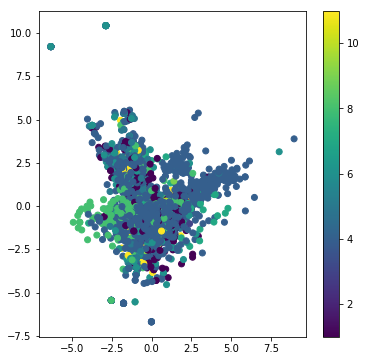

In [23]:
print('size x_test_encoded : ', x_test_encoded.shape)
    
print(len(x_cat_test))
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=x_cat_test)
plt.colorbar()
plt.show()
    
# for i in range(latent_dim):
#     for j in range(latent_dim):
#         plt.figure(figsize=(6, 6))
#         plt.scatter(x_test_encoded[:, i], x_test_encoded[:, j], c=x_cat_test)
#         plt.colorbar(ticks=range(11), label='categorie value')
#         plt.show()



### Simple Autoencoder

In [24]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras import backend as K
from keras import metrics
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

import matplotlib.pyplot as plt

nb_epoch = 100
batch_size = 32
encoding_dim = 600
    
def autoencoder_simple(x_train, x_test):

    print('Start simple autoencoder')

    #Build the model
    input_dim = x_train.shape[1]
    print('input_dim:', input_dim)

    input_layer = Input(shape=(input_dim,))
    print('input_layer:', input_layer)

    encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
    
    encoder = Dense(int(encoding_dim/2), activation="relu")(encoder)

    decoder = Dense(int(encoding_dim/2), activation="tanh")(encoder)
    decoder = Dense(input_dim, activation="relu")(decoder)

    autoencoder = Model(inputs=input_layer, output=decoder)

    #Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath="models.h5", verbose=0, save_best_only=True)

    tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

    history = autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, 
                              shuffle=False,
                              validation_data=(x_test,x_test), verbose=1,
                             callbacks=[checkpointer, tensorboard]).history

    autoencoder = load_model('models.h5')

    #2D
    x_test_encoded = autoencoder.predict(x_test, batch_size=batch_size)
    
    return history, x_test_encoded

In [28]:
history, x_test_encoder_simpl_auto = autoencoder_simple(x_train, x_test)

Start simple autoencoder
input_dim: 600
input_layer: Tensor("input_3:0", shape=(?, 600), dtype=float32)


/home/karim/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 7398 samples, validate on 3172 samples
Epoch 1/100
7398/7398 [==============================] - 10s 1ms/step - loss: 0.2680 - acc: 0.0372 - val_loss: 0.2138 - val_acc: 0.0590
Epoch 2/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.1501 - acc: 0.0470 - val_loss: 0.1408 - val_acc: 0.0662
Epoch 3/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.1068 - acc: 0.0552 - val_loss: 0.1079 - val_acc: 0.0504
Epoch 4/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0915 - acc: 0.0588 - val_loss: 0.0979 - val_acc: 0.0567
Epoch 5/100
7398/7398 [==============================] - 8s 1ms/step - loss: 0.0868 - acc: 0.0634 - val_loss: 0.0945 - val_acc: 0.0681
Epoch 6/100
7398/7398 [==============================] - 7s 1ms/step - loss: 0.0859 - acc: 0.0656 - val_loss: 0.0934 - val_acc: 0.0665
Epoch 7/100
7398/7398 [==============================] - 8s 1ms/step - loss: 0.0856 - acc: 0.0653 - val_loss: 0.0942 - val_acc: 0.0829
Epoch 

Epoch 61/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0832 - acc: 0.1322 - val_loss: 0.0915 - val_acc: 0.1245
Epoch 62/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0826 - acc: 0.1330 - val_loss: 0.0917 - val_acc: 0.1141
Epoch 63/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0832 - acc: 0.1238 - val_loss: 0.0920 - val_acc: 0.1078
Epoch 64/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0823 - acc: 0.1272 - val_loss: 0.0928 - val_acc: 0.1173
Epoch 65/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0825 - acc: 0.1333 - val_loss: 0.0918 - val_acc: 0.1037
Epoch 66/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0822 - acc: 0.1292 - val_loss: 0.0928 - val_acc: 0.1185
Epoch 67/100
7398/7398 [==============================] - 9s 1ms/step - loss: 0.0820 - acc: 0.1325 - val_loss: 0.0911 - val_acc: 0.1296
Epoch 68/100
7398/7398 [========================

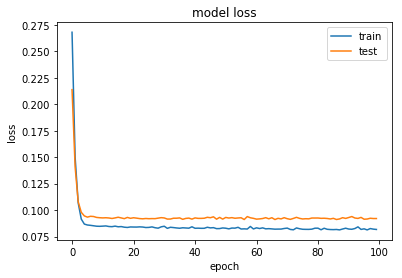

x_test_encoder_simpl_auto.shape: (3172, 600)


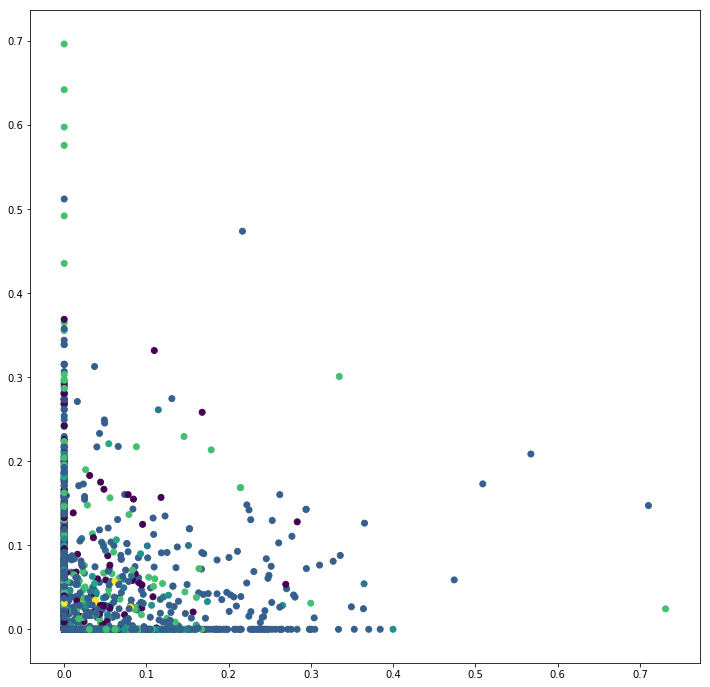

In [29]:
#Evaluation
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

print('x_test_encoder_simpl_auto.shape:',x_test_encoder_simpl_auto.shape)

plt.figure(figsize=(12,12))
# plt.colorbar()
plt.scatter(x_test_encoder_simpl_auto[:,0], x_test_encoder_simpl_auto[:,1], c=x_cat_test)
plt.show()
       
#     for i in range(5):
#         for j in range(5):
#             print('i:{} - j:{}'.format(i,j))
#             x_test_encoded = autoencoder.predict(x_test, batch_size=batch_size)
#             print('x_test_encoded.shape:',x_test_encoded.shape)
#             plt.figure(figsize=(6,6))
#             plt.scatter(x_test_encoded[:,i], x_test_encoded[:,j], c=x_cat_test)
#             plt.show()

### Sequence-to-sequence LSTM

may be to remove

In [30]:
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.models import Model
from keras import backend as K

from keras.utils.vis_utils import plot_model

num_encoder_tokens = 600
num_decoder_tokens = 600
latent_dim = 150
batch_size = 32
epochs = 20

#The same size of latent_dim
n_units = 150

# ENCODERS
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h,state_c]

# DECODER
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# # INFERENCE ENCODER
# encoder_model = Model(encoder_inputs, encoder_states)

# # INFERENCE DECODER
# decoder_state_input_h = Input(shape=(n_units,))
# decoder_state_input_c = Input(shape=(n_units,))
# decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
# decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
# decoder_states = [state_h,state_c]
# decoder_outputs = decoder_dense(decoder_outputs)
# decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

plot_model(model, to_file='model.png', show_shapes=True)
print(model.summary())

x_train_re = x_train.reshape((1,x_train.shape[0],x_train.shape[1]))
x_test_re = x_test.reshape((1,x_test.shape[0],x_test.shape[1]))

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

model.fit([x_train_re, x_train_re], x_train_re, 
          batch_size=batch_size,
         epochs=epochs)

# evaluate LSTM
#x_test_reshape = x_test.reshape((1, x_train.shape[0],x_train.shape[1]))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, 600)    0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, None, 600)    0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 150), (None, 450600      input_4[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 150),  450600      input_5[0][0]                    
                                                                 lstm_1[0][1]                     
          

## <font color="red">TODO T-SNE</font> 

In [55]:
def t_sne_model():
    print('start t-sne')

In [56]:
t_sne_model()

start t-sne


### Classification avec Kmeans

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, random_state=0).fit(x_train)
print('kmeans:', kmeans)
print('kmeans.labels_:',kmeans.labels_)

kmeans_predict = kmeans.predict(x_test)
print('kmeans_predict:',kmeans_predict)

kmeans_predict_incr = kmeans_predict+1
print('kmeans_predict_incr:',kmeans_predict_incr)

#difference:
difference = kmeans_predict_incr-x_cat_test
print('difference:',difference)

print('sum(abs(difference)):',sum(abs(difference)))

print(x_train.shape)

kmeans: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
kmeans.labels_: [3 3 6 ... 1 0 3]
kmeans_predict: [4 7 7 ... 7 7 7]
kmeans_predict_incr: [5 8 8 ... 8 8 8]
difference: [1 4 4 ... 4 4 4]
sum(abs(difference)): 8928
(7398, 600)


k-means++	6.93s	210815	0.102	0.079	0.089	-0.001	0.076	-0.027
random   	7.28s	211259	0.095	0.078	0.085	-0.000	0.074	0.013
PCA-based	0.64s	212620	0.097	0.070	0.081	-0.017	0.067	0.000
__________________________________________________________________________________


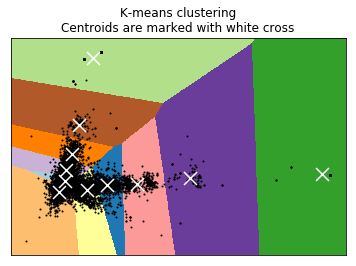

In [32]:

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

n_class = 11

sample_size = 7000

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(x_cat_train, estimator.labels_),
             metrics.completeness_score(x_cat_train, estimator.labels_),
             metrics.v_measure_score(x_cat_train, estimator.labels_),
             metrics.adjusted_rand_score(x_cat_train, estimator.labels_),
             metrics.adjusted_mutual_info_score(x_cat_train,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_class, n_init=10),name="k-means++", data=x_train)

bench_k_means(KMeans(init='random', n_clusters=n_class, n_init=10),name="random", data=x_train)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_class).fit(x_train)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_class, n_init=1),
              name="PCA-based",
              data=x_train)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(x_train)
kmeans = KMeans(init='k-means++', n_clusters=n_class, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## QUESTION CATEGORY DISTRIBUTION

categories_dict_dev: ({'which': 700, 'where': 477, 'what': 6023, 'who': 1108, 'verb': 83, 'how': 1225, 'when': 713, 'whose': 40, 'why': 155, 'whom': 37, 'other': 9}, 10570)
sorted_categories_dict_dev: [('other', 9), ('whom', 37), ('whose', 40), ('verb', 83), ('why', 155), ('where', 477), ('which', 700), ('when', 713), ('who', 1108), ('how', 1225), ('what', 6023)]
sorted_categories_dict_dev_values: [9, 37, 40, 83, 155, 477, 700, 713, 1108, 1225, 6023]
sorted_categories_dict_dev_value_pct: [0.09, 0.35, 0.38, 0.79, 1.47, 4.51, 6.62, 6.75, 10.48, 11.59, 56.98]


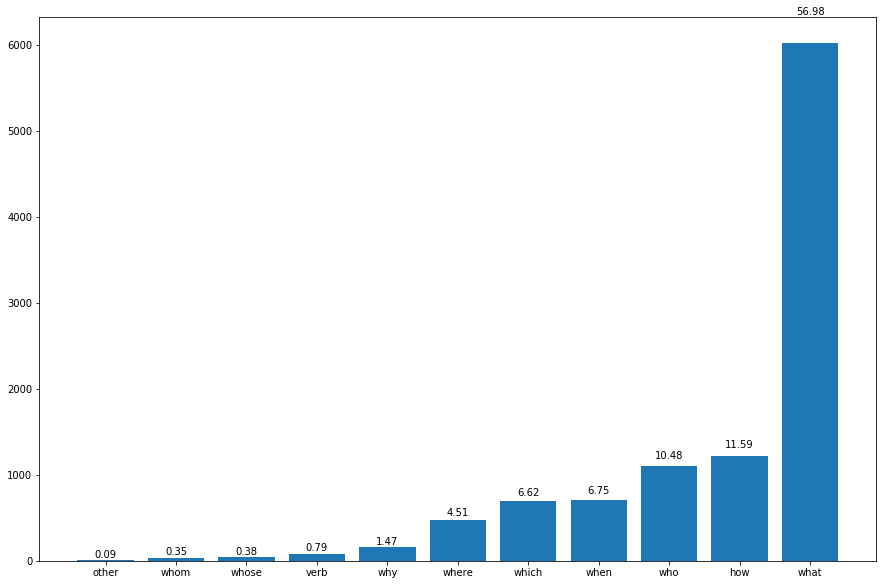

categories_dict_train: ({'whom': 345, 'what': 50491, 'which': 6093, 'when': 5702, 'how': 9398, 'where': 3716, 'who': 8811, 'whose': 302, 'why': 1228, 'verb': 1412, 'other': 101}, 87599)
sorted_categories_dict_train: [('other', 101), ('whose', 302), ('whom', 345), ('why', 1228), ('verb', 1412), ('where', 3716), ('when', 5702), ('which', 6093), ('who', 8811), ('how', 9398), ('what', 50491)]
sorted_categories_dict_train_value_pct: [0.12, 0.34, 0.39, 1.4, 1.61, 4.24, 6.51, 6.96, 10.06, 10.73, 57.64]


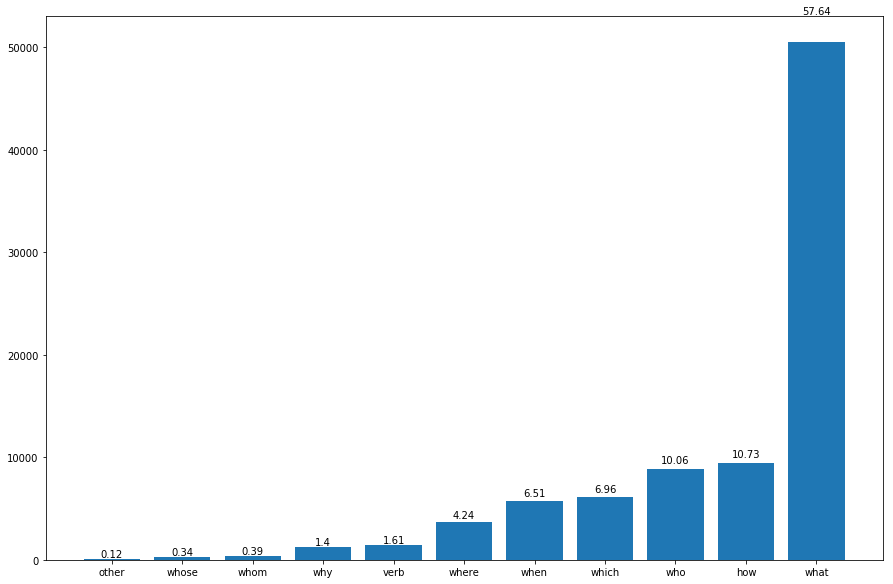

In [52]:
import matplotlib.pyplot as plt

import numpy as np

def autolabel(rects, value_pct):
    """
    Attach a text label above each bar displaying its height
    """
    for rect, pct in zip(rects,value_pct):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                pct,
                ha='center', va='bottom')

categorie_question_filename_train = 'data/question/train_ques_categories.txt'
categorie_question_filename_dev = 'data/question/dev_ques_categories.txt'

categories_dict_dev = get_agregate_questions_categories(categorie_question_filename_dev)

print('categories_dict_dev:', categories_dict_dev)  

sorted_categories_dict_dev = sorted(categories_dict_dev[0].items(), key=lambda x: x[1])
print('sorted_categories_dict_dev:', sorted_categories_dict_dev)  

sorted_categories_dict_dev_keys = [x[0] for x in sorted_categories_dict_dev]
sorted_categories_dict_dev_values = [x[1] for x in sorted_categories_dict_dev]

print('sorted_categories_dict_dev_values:',sorted_categories_dict_dev_values)

sorted_categories_dict_dev_value_pct = [round(x*100/sum(sorted_categories_dict_dev_values),2) for x in sorted_categories_dict_dev_values]
print('sorted_categories_dict_dev_value_pct:',sorted_categories_dict_dev_value_pct)

fig, ax = plt.subplots(figsize=(15,10))
rects_dev = ax.bar(np.arange(11), sorted_categories_dict_dev_values, 0, color='r')
autolabel(rects_dev,sorted_categories_dict_dev_value_pct)
ax.bar(sorted_categories_dict_dev_keys,sorted_categories_dict_dev_values)
plt.show()

categories_dict_train = get_agregate_questions_categories(categorie_question_filename_train)

print('categories_dict_train:', categories_dict_train)  
sorted_categories_dict_train = sorted(categories_dict_train[0].items(), key=lambda x: x[1])
print('sorted_categories_dict_train:',sorted_categories_dict_train)

sorted_categories_dict_train_keys = [x[0] for x in sorted_categories_dict_train]
sorted_categories_dict_train_values = [x[1] for x in sorted_categories_dict_train]

sorted_categories_dict_train_value_pct = [round(x*100/sum(sorted_categories_dict_train_values),2) for x in sorted_categories_dict_train_values]
print('sorted_categories_dict_train_value_pct:',sorted_categories_dict_train_value_pct)

fig, ax = plt.subplots(figsize=(15,10))
rects_train = ax.bar(np.arange(11), sorted_categories_dict_train_values, 0, color='r')
autolabel(rects_train,sorted_categories_dict_train_value_pct)
ax.bar(sorted_categories_dict_train_keys,sorted_categories_dict_train_values)
plt.show()